##### Load modules

In [96]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

##### Load Images to tf data pipeline

In [97]:
try:
    images = tf.data.Dataset.list_files('data\\images\\*.jpg' , shuffle=False)
except:
    print("Empty directory...")

Empty directory...


In [98]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [101]:
try:
    images = images.map(load_image)
    images.as_numpy_iterator().next()
except:
    print("Error")

Error


##### View raw images with matplotlib

In [102]:
image_generator = images.batch(4).as_numpy_iterator()

In [103]:
plot_images = image_generator.next()

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: data\images\5956cb82-ad27-11ed-b298-9144134abcba.jpg : The system cannot find the file specified.
; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [ ]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

##### Split train , test , val

In [ ]:
try:
    import os
    import random
    import shutil

    # Define the paths of the 'images' folder and the new folder
    images_folder_path = 'data\\images'
    train_folder_path = 'data\\train\\images'
    test_folder_path = 'data\\test\\images'
    val_folder_path = 'data\\val\\images'

    # Count the total number of images in the 'images' folder
    total_images_count = len(os.listdir(images_folder_path))

    # Calculate the count of images to move to the new folder
    images_test = int(0.125 * total_images_count)
    images_val = int(0.125 * total_images_count)


    # Get a list of all the images in the 'images' folder
    image_names = os.listdir(images_folder_path)

    # Shuffle the image names list to get random images
    random.shuffle(image_names)

    # Move the first 'images_to_move_count' number of images to the new folder
    for i in range(images_test):
        image_path = os.path.join(images_folder_path, image_names[i])
        new_image_path = os.path.join(test_folder_path, image_names[i])
        shutil.move(image_path, new_image_path)

    # Get a list of all the images in the 'images' folder
    image_names = os.listdir(images_folder_path)

    # Shuffle the image names list to get random images
    random.shuffle(image_names)    

    for i in range(images_val):
        image_path = os.path.join(images_folder_path, image_names[i])
        new_image_path = os.path.join(val_folder_path, image_names[i])
        shutil.move(image_path, new_image_path)

    # Loop through the files in the source folder
    for filename in os.listdir(images_folder_path):
        # Check if the file is an image by checking the file extension
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Construct the source and destination paths for the image file
            source_path = os.path.join(images_folder_path, filename)
            destination_path = os.path.join(train_folder_path, filename)
            # Move the image file to the destination folder
            shutil.move(source_path, destination_path)
except:
    print("error")

##### Split label

In [104]:
try:
    for folder in ['train' , 'test' , 'val']:
        for file in os.listdir(os.path.join('data' , folder , 'images')):
            filename = file.split('.')[0]+'.json'
            existing_filepath = os.path.join('data' , 'labels' , filename)
            if os.path.exists(existing_filepath):
                new_filepath = os.path.join('data' , folder , 'labels' , filename)
                os.replace(existing_filepath , new_filepath)
except:
    print("error")

### Data Augmentation

In [105]:
import albumentations as alb 

In [106]:
augmentor = alb.Compose([alb.RandomCrop(width=450 , height=450),
                         alb.HorizontalFlip(0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                 label_fields=['class_labels']))

In [107]:
img = cv2.imread(os.path.join('data' , 'train' , 'images' , '5a039012-ad27-11ed-af23-9144134abcba.jpg'))

In [108]:
img

array([[[215, 181, 165],
        [210, 176, 160],
        [209, 174, 160],
        ...,
        [204, 198, 223],
        [207, 201, 224],
        [208, 202, 225]],

       [[211, 177, 161],
        [217, 184, 169],
        [227, 194, 179],
        ...,
        [198, 192, 217],
        [202, 196, 219],
        [204, 198, 221]],

       [[213, 180, 165],
        [214, 183, 168],
        [216, 187, 173],
        ...,
        [188, 182, 207],
        [197, 188, 214],
        [204, 195, 221]],

       ...,

       [[ 94,  87, 108],
        [ 91,  85, 104],
        [ 99,  90, 110],
        ...,
        [ 70,  66, 101],
        [ 70,  66, 101],
        [ 69,  65, 100]],

       [[ 93,  88, 109],
        [ 91,  87, 106],
        [ 95,  89, 108],
        ...,
        [ 67,  65, 101],
        [ 67,  65, 101],
        [ 64,  62,  98]],

       [[ 92,  87, 108],
        [ 94,  90, 109],
        [ 96,  90, 109],
        ...,
        [ 68,  66, 102],
        [ 66,  64, 100],
        [ 62,  60,  96]]

In [109]:
with open(os.path.join('data' , 'train' , 'labels' , '5a039012-ad27-11ed-af23-9144134abcba.json') , 'r') as f:
    label = json.load(f)

In [110]:
label['shapes'][0]['points']

[[249.69543147208122, 61.8274111675127],
 [458.3248730964467, 367.4111675126904]]

In [111]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [112]:
coords

[249.69543147208122, 61.8274111675127, 458.3248730964467, 367.4111675126904]

In [113]:
coords = list(np.divide(coords , [640,480,640,480]))

In [114]:
coords

[0.3901491116751269,
 0.12880710659898478,
 0.716132614213198,
 0.7654399323181049]

In [115]:
augmented = augmentor(image=img , bboxes=[coords] , class_labels=['face'])

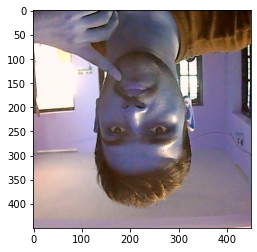

In [116]:
plt.imshow(augmented['image'])

In [117]:
augmented['bboxes']

[(0.28816694867456283,
  0.1990862944162436,
  0.7517879300620417,
  0.8781613085166384)]

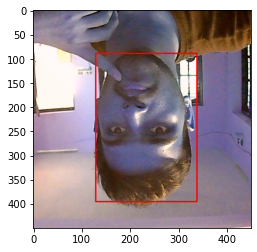

In [120]:
cv2.rectangle(augmented['image'] , 
             tuple(np.multiply(augmented['bboxes'][0][:2] , [450,450]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:] , [450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

### Run Augmentation Pipeline

In [131]:
for partition in ['train' , 'test' , 'val']:
    for image in os.listdir(os.path.join('data' , partition , 'images')):
        img = cv2.imread(os.path.join('data' , partition , 'images' , image))
        
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data' , partition , 'labels' , f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
                with open(label_path , 'r') as f:
                    label = json.load(f)
                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]
                coords = list(np.divide(coords , [640 , 480 , 640 , 480]))
        
        for x in range(60):
            augmented = augmentor(image=img , bboxes=[coords] , class_labels=['face'])
            cv2.imwrite(os.path.join('aug_data' , partition , 'images' , f'{image.split(".")[0]}.{x}.jpg') , augmented['image'])

            annotation = {}
            annotation['image'] = image

            if os.path.exists(label_path):
                if len(augmented['bboxes'])==0:
                    annotation['bbox']=[0,0,0,0]
                    annotation['class']=0
                else:
                    annotation['bbox']=augmented['bboxes'][0]
                    annotation['class']=1

                with open(os.path.join('aug_data' , partition , 'labels' , f'{image.split(".")[0]}.{x}.json'),'w') as f:
                    json.dump(annotation , f)